In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import random
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Flatten, Conv2D, Activation, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt # pip install matplotlib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [8]:
DATASET_DIR = os.listdir("F:\\SEM7\\INT248\\Project\\Flower_data\\flowers") 
DATASET_DIR

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [9]:
labels = ['daisy', 'rose', 'dandelion', 'sunflower', 'tulip'] #labels
DIR = "F:\\SEM7\\INT248\\Project\\Flower_data\\flowers" # path
link = []
for label in labels:
    path = os.path.join(DIR, label) # combine path and labels
    link.append(path) # append in link
print(link)


for i in range(len(link)):
    new = os.listdir(link[i])
    i+=1
    print(f"length : {len(new)}") # each folder total image count 

['F:\\SEM7\\INT248\\Project\\Flower_data\\flowers\\daisy', 'F:\\SEM7\\INT248\\Project\\Flower_data\\flowers\\rose', 'F:\\SEM7\\INT248\\Project\\Flower_data\\flowers\\dandelion', 'F:\\SEM7\\INT248\\Project\\Flower_data\\flowers\\sunflower', 'F:\\SEM7\\INT248\\Project\\Flower_data\\flowers\\tulip']
length : 769
length : 784
length : 1055
length : 734
length : 984


In [10]:
IMG_SIZE = 224
data = [] 

def get_data(data_dir):
    for category in labels:
        path = os.path.join(data_dir, category) #combine path
        class_num = labels.index(category) # index no of labels
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR) # color image array
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # resize
                data.append([resized_array, class_num])
            except Exception as e: # exception
                print(e)
    return np.array(data) # return array


In [11]:
new_data = get_data("F:\\SEM7\\INT248\\Project\\Flower_data\\flowers") # path for fu

OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-52oirelq\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-52oirelq\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-52oirelq\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



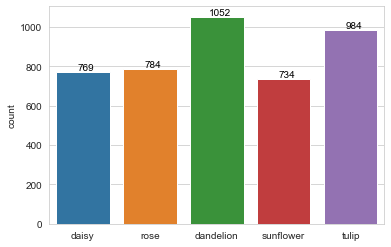

In [12]:
import seaborn as sns

l = []
for i in new_data:
    l.append(labels[i[1]])
sns.set_style('whitegrid')
countplot = sns.countplot(l)

for p in countplot.patches:
    countplot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.45, p.get_height()+0.1), ha='center', va='bottom', color= 'black') # show the count no.

###  Shuffle the data, cause every category should present in trainning data...


In [14]:
random.shuffle(new_data) # shuffle data


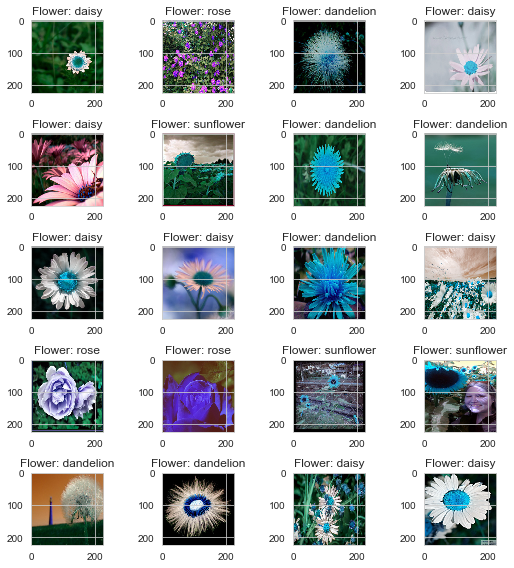

In [15]:
# random image visualization
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    r = random.randint(0, len(new_data))
    img = (new_data[r][0])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.title(f"Flower: {labels[new_data[r][1]]}")
    fig.tight_layout()
plt.show()

In [16]:
# separate item and label
X = []
y = []
for item, label in new_data:
    X.append(item)
    y.append(label)

### Normalize data, It will keep the value in range(0 to 1). Normalization is the process of organizing a database to reduce redundancy and improve data integrity.

In [17]:
X = np.array(X) / 255 # Normaliation( Now the array will remain 0-1)
y = np.array(y)

In [18]:
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 3) # Reshape array with channel 3

### labelbinarizer convert your labelthink labels = ['daisy', 'rose', 'dandelion', 'sunflower', 'tulip']then rose will convert like 0 1 0 0 0daisy will convert like 1 0 0 0 0

In [19]:
from sklearn.preprocessing import LabelBinarizer # LabelBinarizer
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)



## Split train and test data

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

## Training the model 

In [23]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(5, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32) # training part with 10 epochs

Epoch 1/10
109/109 [==============================] - 770s 7s/step - loss: 1.5423 - accuracy: 0.4905 - val_loss: 1.0021 - val_accuracy: 0.6185
Epoch 2/10
109/109 [==============================] - 232s 2s/step - loss: 0.9165 - accuracy: 0.6492 - val_loss: 0.7360 - val_accuracy: 0.7318
Epoch 3/10
109/109 [==============================] - 204s 2s/step - loss: 0.7030 - accuracy: 0.7420 - val_loss: 0.6468 - val_accuracy: 0.7665
Epoch 4/10
109/109 [==============================] - 204s 2s/step - loss: 0.5414 - accuracy: 0.8036 - val_loss: 0.6201 - val_accuracy: 0.7838
Epoch 5/10
109/109 [==============================] - 203s 2s/step - loss: 0.3914 - accuracy: 0.8615 - val_loss: 0.5335 - val_accuracy: 0.8358
Epoch 6/10
109/109 [==============================] - 203s 2s/step - loss: 0.2608 - accuracy: 0.9147 - val_loss: 0.5989 - val_accuracy: 0.8451
Epoch 7/10
109/109 [==============================] - 203s 2s/step - loss: 0.1878 - accuracy: 0.9387 - val_loss: 0.5371 - val_accuracy: 0.8671

In [30]:
score = model.evaluate(x_test, y_test)
model.save("cnn.model") # save model

28/28 [==============================] - 9s 305ms/step - loss: 0.4830 - accuracy: 0.8902
INFO:tensorflow:Assets written to: cnn.model\assets


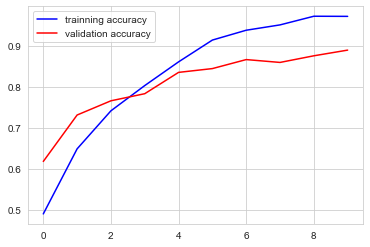

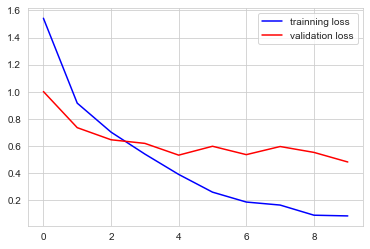

In [26]:
# ploting 
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

### Predict images 

In [33]:
predictions = model.predict_classes(x_test)
predictions[:10]

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

### inverse_transform them to original classes.


In [29]:
y_test_inv_label = label_binarizer.inverse_transform(y_test)

## create a function for model prediction test

In [31]:
# predict function
labels = ['daisy', 'rose', 'dandelion', 'sunflower', 'tulip']

def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("cnn.model")

In [ ]:
prediction = model.predict_classes([prepare("F:\\SEM7\\INT248\\Project\\Flower_data\\flowers\\dandelion")])
print(labels[(prediction[0])])  # predict rose

## confusion matrics

In [39]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test_inv_label)):
    if(y_test_inv_label[i] == predictions[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test_inv_label)):
    if(y_test_inv_label[i] != predictions[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break


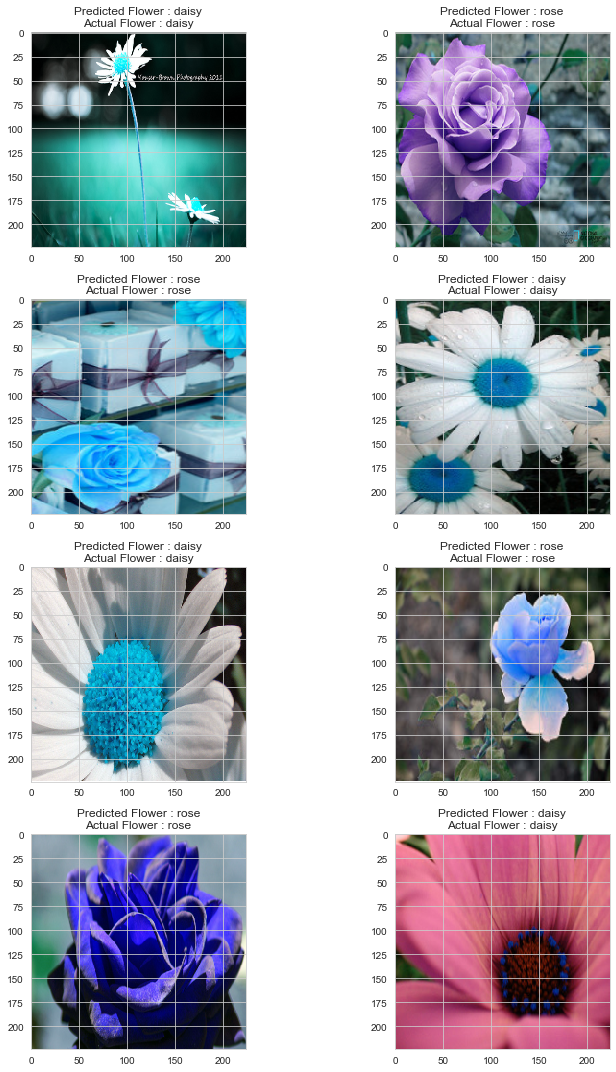

In [41]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+ labels[predictions[prop_class[count]]] +"\n"+"Actual Flower : "+ labels[y_test_inv_label[prop_class[count]]])
        plt.tight_layout()
        count+=1
